792


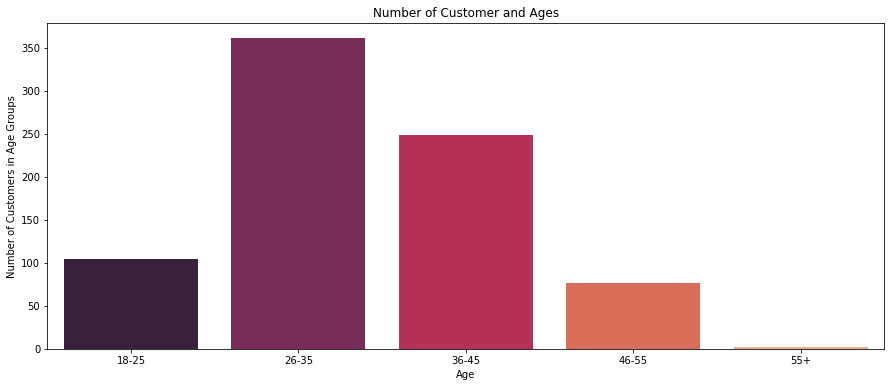

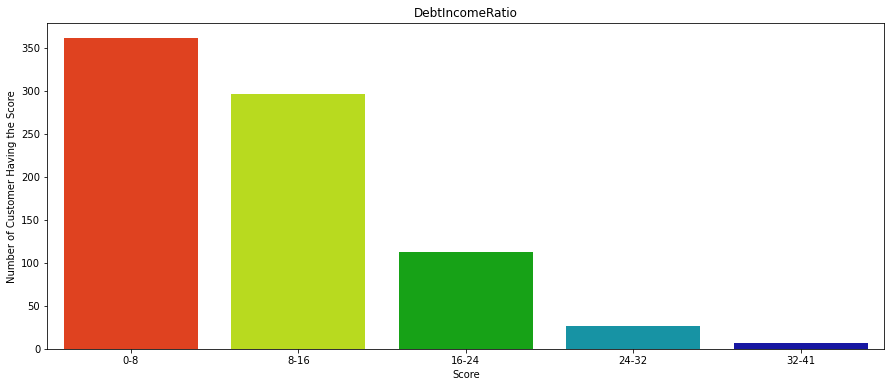

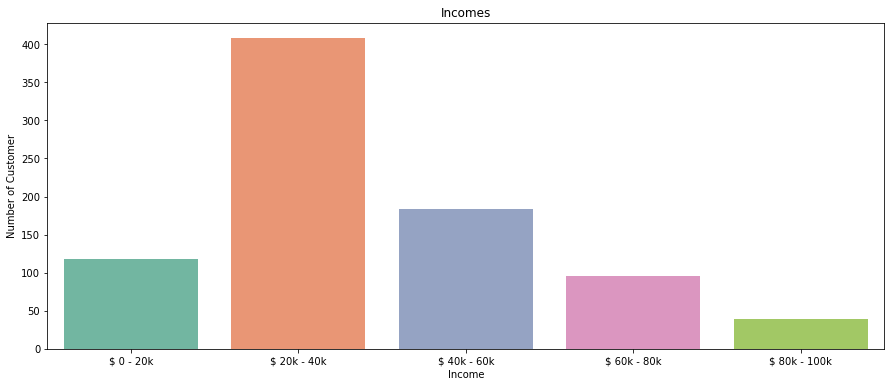

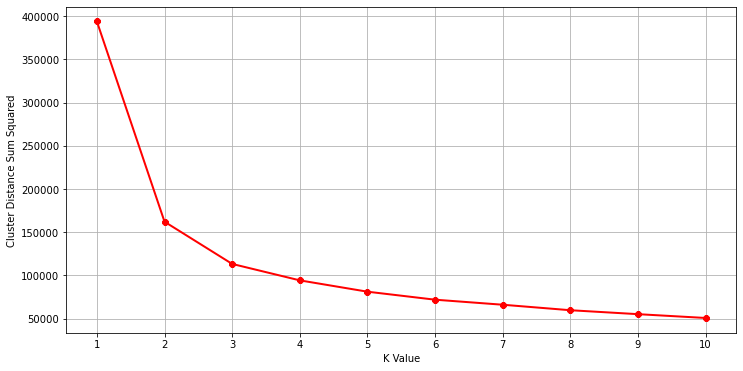

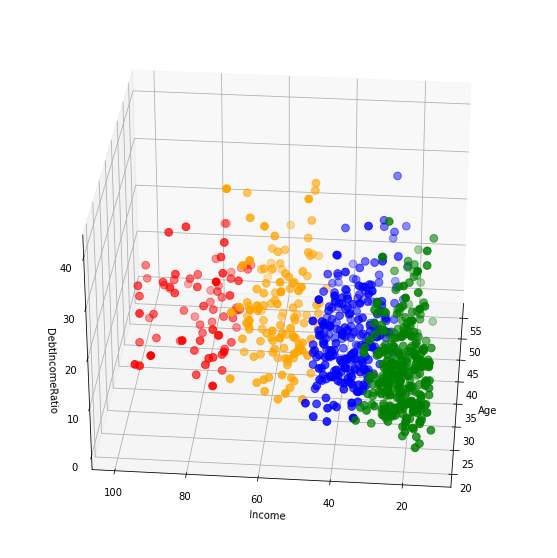

In [14]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/aryanmalhotra/Downloads/Cust_Segmentation.csv")
df.head()

df.drop("Customer Id", axis = 1, inplace=True)
df.drop("Edu", axis = 1, inplace=True)
df.drop("Years Employed", axis = 1, inplace=True)
df.drop("Card Debt", axis = 1, inplace=True)
df.drop("Other Debt", axis = 1, inplace=True)
df.drop("Defaulted", axis = 1, inplace=True)
df.drop("Address", axis = 1, inplace=True)

df.drop(df[(df['Income'] >100)].index, inplace=True)

print(len(df))

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers in Age Groups")
plt.show()

ss0_8 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 0) & (df["DebtIncomeRatio"] <= 8)]
ss8_16 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 8) & (df["DebtIncomeRatio"] <= 16)]
ss16_24 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 16) & (df["DebtIncomeRatio"] <= 24)]
ss24_32 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 24) & (df["DebtIncomeRatio"] <= 32)]
ss32_41 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 32) & (df["DebtIncomeRatio"] <= 41)]

ssx = ["0-8", "8-16", "16-24", "24-32", "32-41"]
ssy = [len(ss0_8.values), len(ss8_16.values), len(ss16_24.values), len(ss24_32.values), len(ss32_41.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("DebtIncomeRatio")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 20)]
ai31_60 = df["Income"][(df["Income"] >= 20) & (df["Income"] <= 40)]
ai61_90 = df["Income"][(df["Income"] >= 40) & (df["Income"] <= 60)]
ai91_120 = df["Income"][(df["Income"] >= 60) & (df["Income"] <= 80)]
ai121_150 = df["Income"][(df["Income"] >= 80) & (df["Income"] <= 100)]

aix = ["$ 0 - 20k", "$ 20k - 40k", "$ 40k - 60k", "$ 60k - 80k", "$ 80k - 100k"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[::])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Cluster Distance Sum Squared")
plt.show()


km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[::])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["DebtIncomeRatio"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["DebtIncomeRatio"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["DebtIncomeRatio"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["DebtIncomeRatio"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["DebtIncomeRatio"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('DebtIncomeRatio')
plt.show()


850


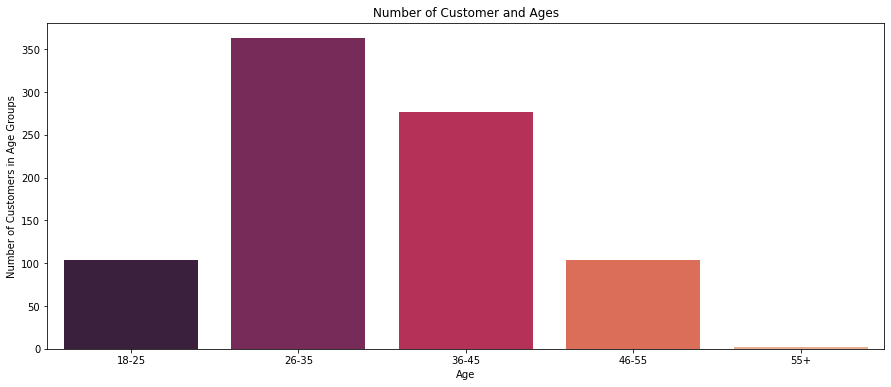

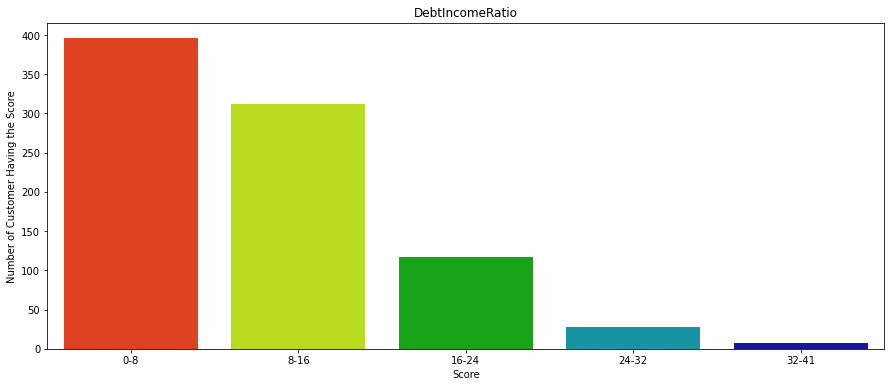

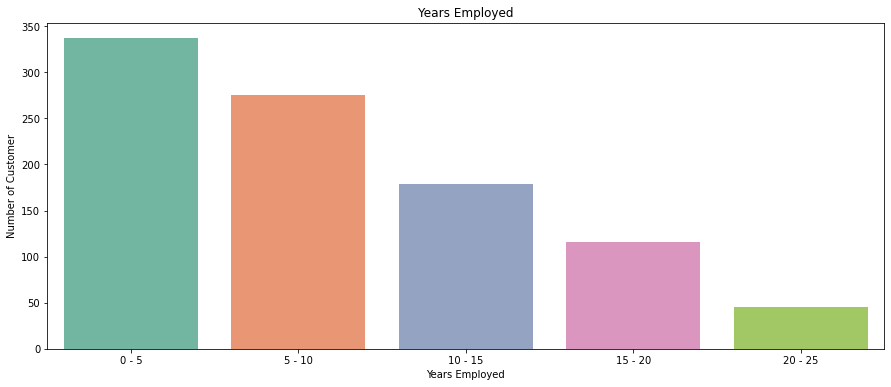

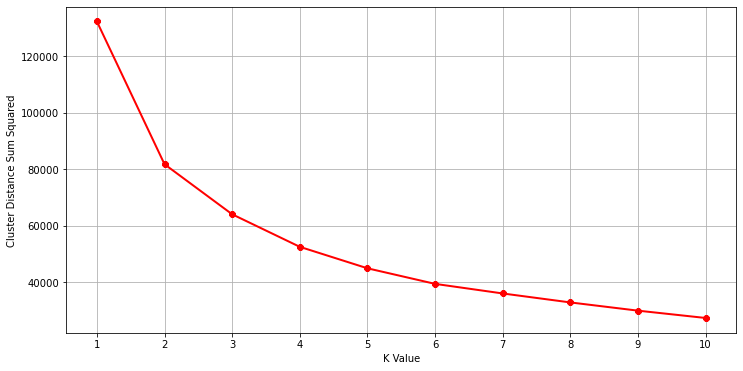

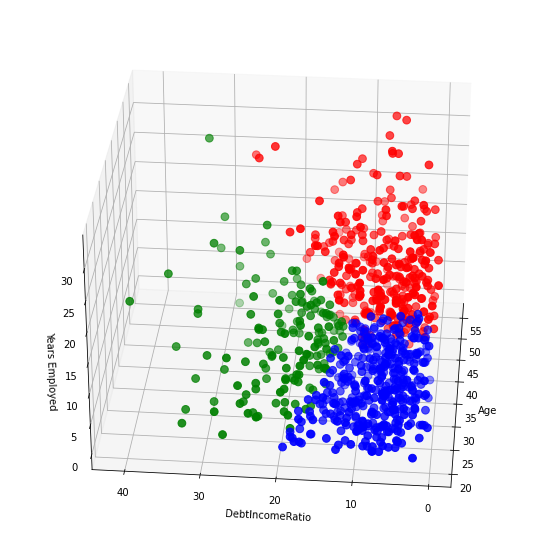

In [15]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/aryanmalhotra/Downloads/Cust_Segmentation.csv")
df.head()

df.drop("Customer Id", axis = 1, inplace=True)
df.drop("Edu", axis = 1, inplace=True)
df.drop("Income", axis = 1, inplace=True)
df.drop("Card Debt", axis = 1, inplace=True)
df.drop("Other Debt", axis = 1, inplace=True)
df.drop("Defaulted", axis = 1, inplace=True)
df.drop("Address", axis = 1, inplace=True)

# df.drop(df[(df['Income'] >100)].index, inplace=True)

print(len(df))

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers in Age Groups")
plt.show()

ss0_8 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 0) & (df["DebtIncomeRatio"] <= 8)]
ss8_16 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 8) & (df["DebtIncomeRatio"] <= 16)]
ss16_24 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 16) & (df["DebtIncomeRatio"] <= 24)]
ss24_32 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 24) & (df["DebtIncomeRatio"] <= 32)]
ss32_41 = df["DebtIncomeRatio"][(df["DebtIncomeRatio"] >= 32) & (df["DebtIncomeRatio"] <= 41)]

ssx = ["0-8", "8-16", "16-24", "24-32", "32-41"]
ssy = [len(ss0_8.values), len(ss8_16.values), len(ss16_24.values), len(ss24_32.values), len(ss32_41.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("DebtIncomeRatio")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

ye0_5 = df["Years Employed"][(df["Years Employed"] >= 0) & (df["Years Employed"] <= 5)]
ye5_10 = df["Years Employed"][(df["Years Employed"] >= 5) & (df["Years Employed"] <= 10)]
ye10_15 = df["Years Employed"][(df["Years Employed"] >= 10) & (df["Years Employed"] <= 15)]
ye15_20 = df["Years Employed"][(df["Years Employed"] >= 15) & (df["Years Employed"] <= 20)]
ye20_25 = df["Years Employed"][(df["Years Employed"] >= 20) & (df["Years Employed"] <= 25)]

yex = ["0 - 5", "5 - 10", "10 - 15", "15 - 20", "20 - 25"]
yey = [len(ye0_5.values), len(ye5_10.values), len(ye10_15.values), len(ye15_20.values), len(ye20_25.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=yex, y=yey, palette="Set2")
plt.title("Years Employed")
plt.xlabel("Years Employed")
plt.ylabel("Number of Customer")
plt.show()

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[::])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Cluster Distance Sum Squared")
plt.show()


km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[::])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df.Age[df.label == 0], df["Years Employed"][df.label == 0], df["DebtIncomeRatio"][df.label == 0], c='blue', s=60)
# ax.scatter(df.Age[df.label == 1], df["Years Employed"][df.label == 1], df["DebtIncomeRatio"][df.label == 1], c='red', s=60)
# ax.scatter(df.Age[df.label == 2], df["Years Employed"][df.label == 2], df["DebtIncomeRatio"][df.label == 2], c='green', s=60)
# ax.scatter(df.Age[df.label == 3], df["Years Employed"][df.label == 3], df["DebtIncomeRatio"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Years Employed"][df.label == 4], df["DebtIncomeRatio"][df.label == 4], c='purple', s=60)
# ax.view_init(30, 185)
# plt.xlabel("Age")
# plt.ylabel("Years Employed")
# ax.set_zlabel('DebtIncomeRatio')
# plt.show()

# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter( df["Years Employed"][df.label == 0],df.Age[df.label == 0], df["DebtIncomeRatio"][df.label == 0], c='blue', s=60)
# ax.scatter( df["Years Employed"][df.label == 1],df.Age[df.label == 1], df["DebtIncomeRatio"][df.label == 1], c='red', s=60)
# ax.scatter( df["Years Employed"][df.label == 2], df.Age[df.label == 2],df["DebtIncomeRatio"][df.label == 2], c='green', s=60)
# ax.scatter( df["Years Employed"][df.label == 3],df.Age[df.label == 3], df["DebtIncomeRatio"][df.label == 3], c='orange', s=60)
# ax.scatter( df["Years Employed"][df.label == 4],df.Age[df.label == 4], df["DebtIncomeRatio"][df.label == 4], c='purple', s=60)
# ax.view_init(30, 185)
# plt.xlabel("Years Employed")
# plt.ylabel("Age")
# ax.set_zlabel('DebtIncomeRatio')
# plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0],  df["DebtIncomeRatio"][df.label == 0], df["Years Employed"][df.label == 0],c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["DebtIncomeRatio"][df.label == 1],df["Years Employed"][df.label == 1],  c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["DebtIncomeRatio"][df.label == 2], df["Years Employed"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3],  df["DebtIncomeRatio"][df.label == 3],df["Years Employed"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["DebtIncomeRatio"][df.label == 4], df["Years Employed"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("DebtIncomeRatio")
ax.set_zlabel('Years Employed')
plt.show()


779


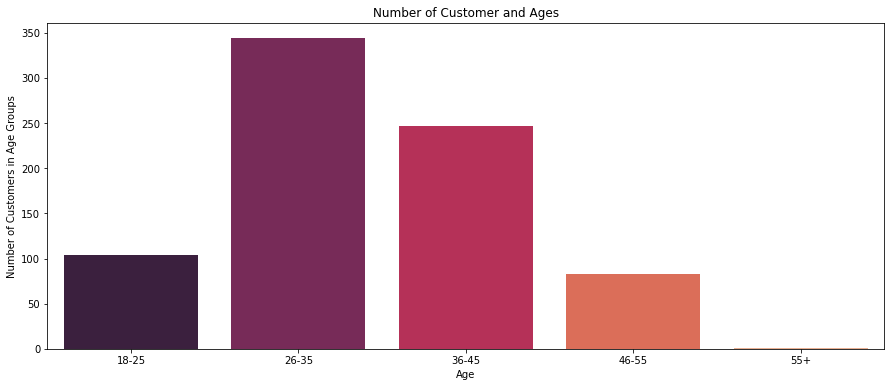

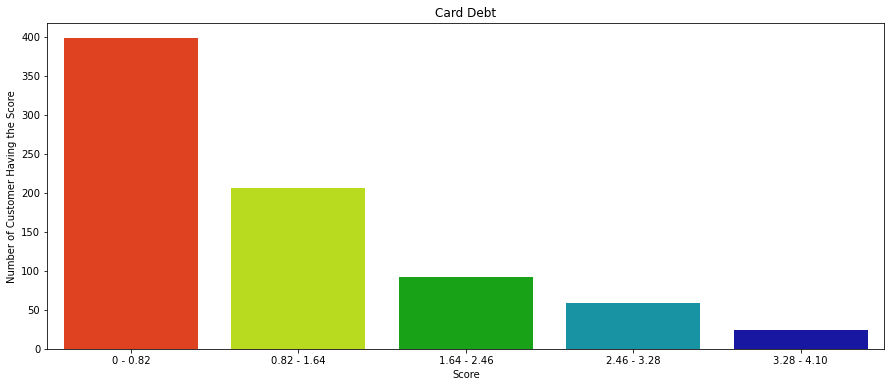

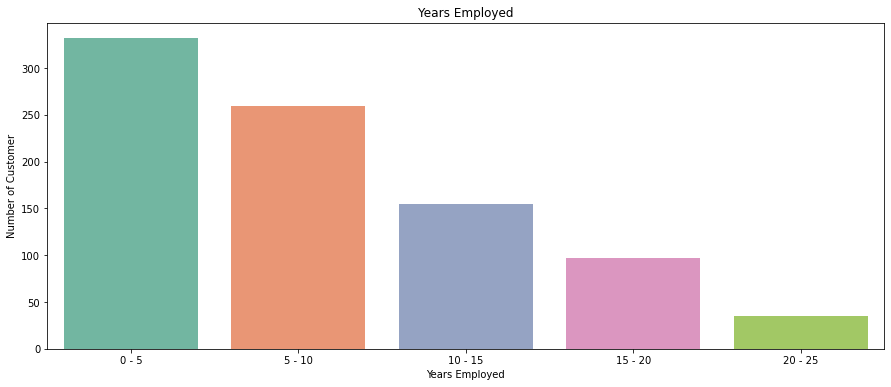

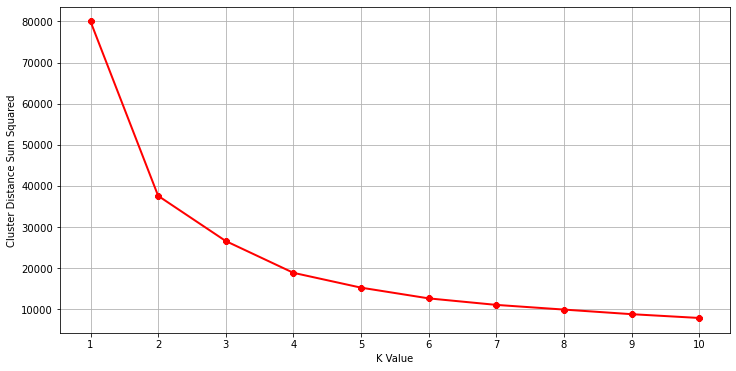

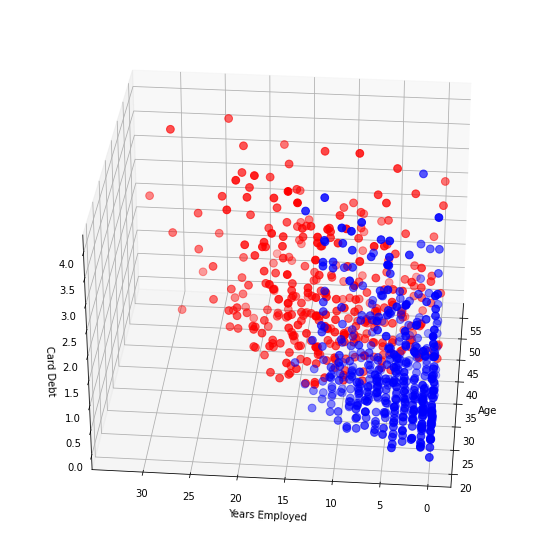

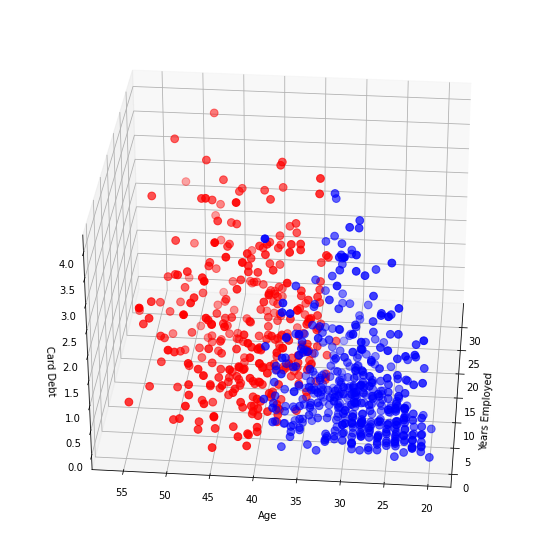

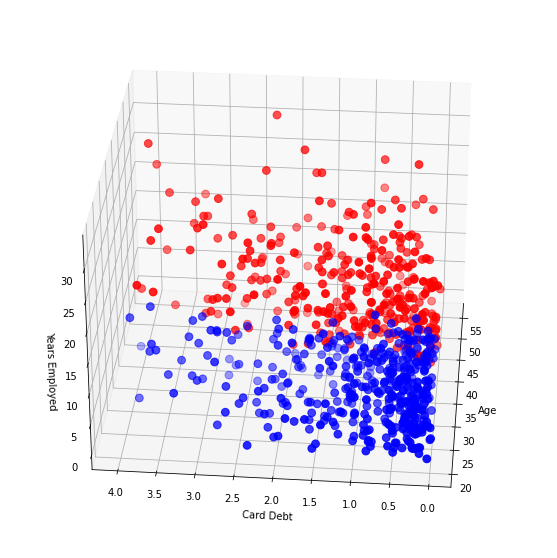

In [19]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/aryanmalhotra/Downloads/Cust_Segmentation.csv")
df.head()

df.drop("Customer Id", axis = 1, inplace=True)
df.drop("Edu", axis = 1, inplace=True)
df.drop("Income", axis = 1, inplace=True)
df.drop("DebtIncomeRatio", axis = 1, inplace=True)
df.drop("Other Debt", axis = 1, inplace=True)
df.drop("Defaulted", axis = 1, inplace=True)
df.drop("Address", axis = 1, inplace=True)

df.drop(df[(df['Card Debt'] > 4.12)].index, inplace=True)

print(len(df))

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers in Age Groups")
plt.show()

cd0_82 = df["Card Debt"][(df["Card Debt"] >= 0) & (df["Card Debt"] <= 0.82)]
cd82_164 = df["Card Debt"][(df["Card Debt"] >= 0.82) & (df["Card Debt"] <= 1.64)]
cd164_246 = df["Card Debt"][(df["Card Debt"] >= 1.64) & (df["Card Debt"] <= 2.46)]
cd246_328 = df["Card Debt"][(df["Card Debt"] >= 2.46) & (df["Card Debt"] <= 3.28)]
cd328_410 = df["Card Debt"][(df["Card Debt"] >= 3.28) & (df["Card Debt"] <= 4.10)]

cdx = ["0 - 0.82", "0.82 - 1.64", "1.64 - 2.46", "2.46 - 3.28", "3.28 - 4.10"]
cdy = [len(cd0_82.values), len(cd82_164.values), len(cd164_246.values), len(cd246_328.values), len(cd328_410.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=cdx, y=cdy, palette="nipy_spectral_r")
plt.title("Card Debt")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

ye0_5 = df["Years Employed"][(df["Years Employed"] >= 0) & (df["Years Employed"] <= 5)]
ye5_10 = df["Years Employed"][(df["Years Employed"] >= 5) & (df["Years Employed"] <= 10)]
ye10_15 = df["Years Employed"][(df["Years Employed"] >= 10) & (df["Years Employed"] <= 15)]
ye15_20 = df["Years Employed"][(df["Years Employed"] >= 15) & (df["Years Employed"] <= 20)]
ye20_25 = df["Years Employed"][(df["Years Employed"] >= 20) & (df["Years Employed"] <= 25)]

yex = ["0 - 5", "5 - 10", "10 - 15", "15 - 20", "20 - 25"]
yey = [len(ye0_5.values), len(ye5_10.values), len(ye10_15.values), len(ye15_20.values), len(ye20_25.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=yex, y=yey, palette="Set2")
plt.title("Years Employed")
plt.xlabel("Years Employed")
plt.ylabel("Number of Customer")
plt.show()

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[::])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Cluster Distance Sum Squared")
plt.show()


km = KMeans(n_clusters=2)
clusters = km.fit_predict(df.iloc[::])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df.Age[df.label == 0], df["Years Employed"][df.label == 0], df["Card Debt"][df.label == 0], c='blue', s=60)
# ax.scatter(df.Age[df.label == 1], df["Years Employed"][df.label == 1], df["Card Debt"][df.label == 1], c='red', s=60)
# ax.scatter(df.Age[df.label == 2], df["Years Employed"][df.label == 2], df["Card Debt"][df.label == 2], c='green', s=60)
# ax.scatter(df.Age[df.label == 3], df["Years Employed"][df.label == 3], df["Card Debt"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Years Employed"][df.label == 4], df["Card Debt"][df.label == 4], c='purple', s=60)
# ax.view_init(30, 185)
# plt.xlabel("Age")
# plt.ylabel("Years Employed")
# ax.set_zlabel('Card Debt')
# plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter( df["Years Employed"][df.label == 0],df.Age[df.label == 0], df["Card Debt"][df.label == 0], c='blue', s=60)
ax.scatter( df["Years Employed"][df.label == 1],df.Age[df.label == 1], df["Card Debt"][df.label == 1], c='red', s=60)
ax.scatter( df["Years Employed"][df.label == 2], df.Age[df.label == 2],df["Card Debt"][df.label == 2], c='green', s=60)
ax.scatter( df["Years Employed"][df.label == 3],df.Age[df.label == 3], df["Card Debt"][df.label == 3], c='orange', s=60)
ax.scatter( df["Years Employed"][df.label == 4],df.Age[df.label == 4], df["Card Debt"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Years Employed")
plt.ylabel("Age")
ax.set_zlabel('Card Debt')
plt.show()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0],  df["Card Debt"][df.label == 0], df["Years Employed"][df.label == 0],c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Card Debt"][df.label == 1],df["Years Employed"][df.label == 1],  c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Card Debt"][df.label == 2], df["Years Employed"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3],  df["Card Debt"][df.label == 3],df["Years Employed"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Card Debt"][df.label == 4], df["Years Employed"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Card Debt")
ax.set_zlabel('Years Employed')
plt.show()
